In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
wine_df = pd.read_csv("winequality-red.csv", sep=";")

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_df.dtypes # Seems everything in order with the type of the data in each column

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Missing values

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_df.isna().sum() # It seems there are no missing values within dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Duplicates

In [7]:
wine_df.shape

(1599, 12)

In [8]:
wine_df.drop_duplicates().shape # There were 40 duplicate rows

(1359, 12)

## Explanatory Analysis

In [9]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:


def plot_distributions(data, variables, colors):
    quartile_colors = ['#FFD700', '#9370DB', '#FF8C00']
    
    for i, (variable, color) in enumerate(zip(variables, colors)):
        
        fig, axes = plt.subplots(1, 2, figsize=(18, 4))  # 1 row, 2 columns for each variable
        
        
        sns.kdeplot(data=data, x=variable, fill=True, ax=axes[0], color=color)
        quartiles = data[variable].quantile([0.25, 0.5, 0.75])
        for j, q in enumerate([0.25, 0.5, 0.75]):
            quartile_label = f'Q{int(q * 4)}'
            line_pos = quartiles[q]
            axes[0].axvline(line_pos, linestyle='--', color=quartile_colors[j], label=quartile_label)
            axes[0].scatter([line_pos], [0], color=quartile_colors[j])
            axes[0].text(line_pos, 0, quartile_label, color="black", ha='left', va='bottom', fontsize='small', fontweight='bold')
        axes[0].set_title(f'Distribution of {variable}', fontsize=12)
        
        
        sns.boxplot(data=data, x=variable, ax=axes[1], color=color)
        axes[1].set_title(f'Boxplot of {variable}', fontsize=12)
        
        plt.tight_layout()
        plt.show()


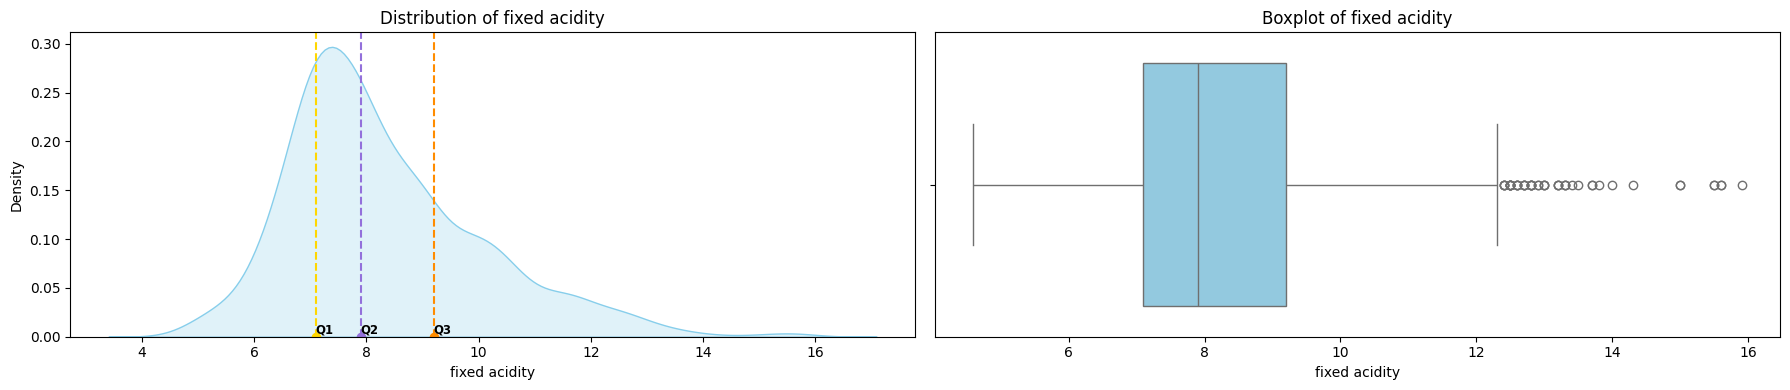

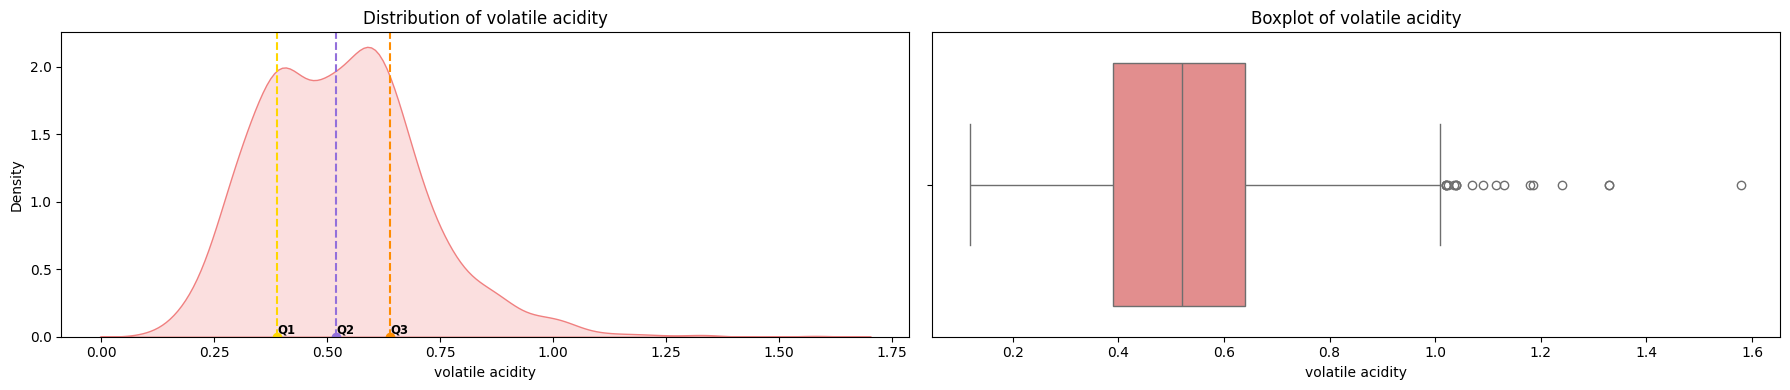

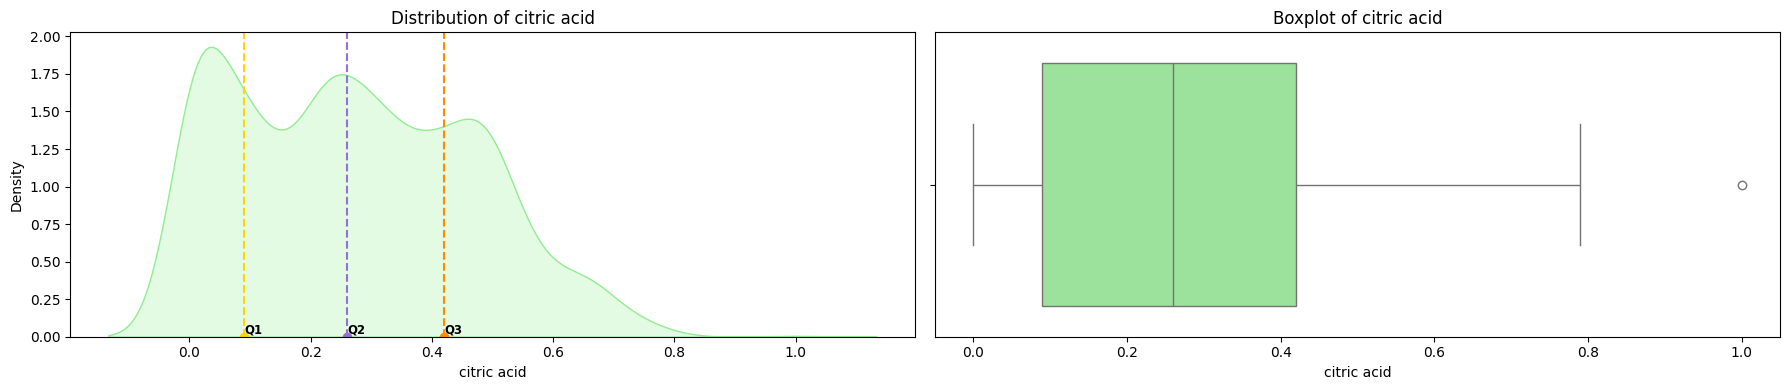

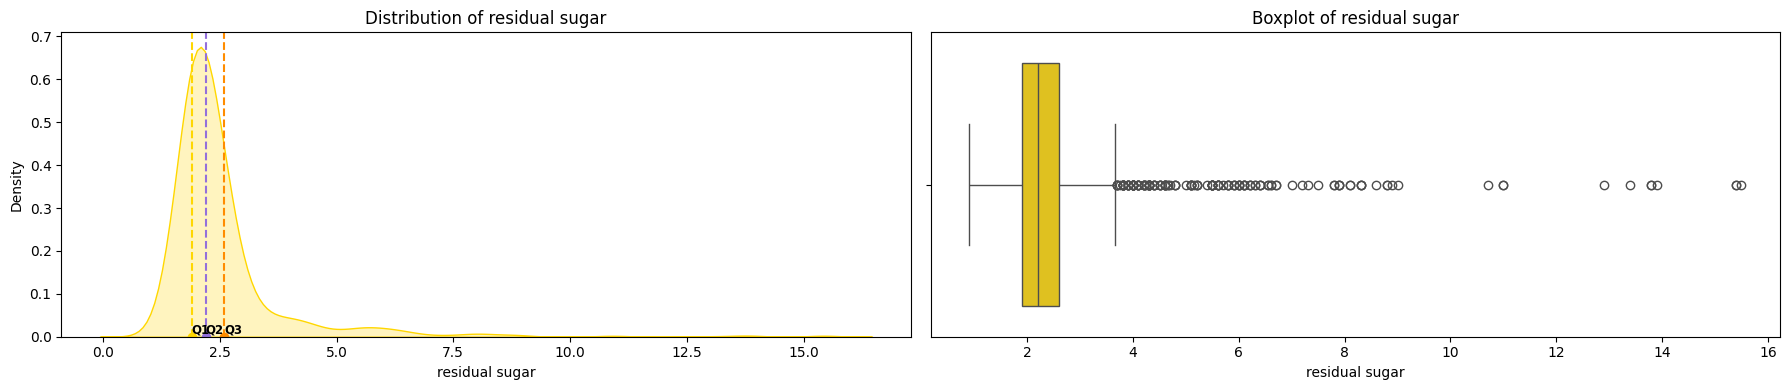

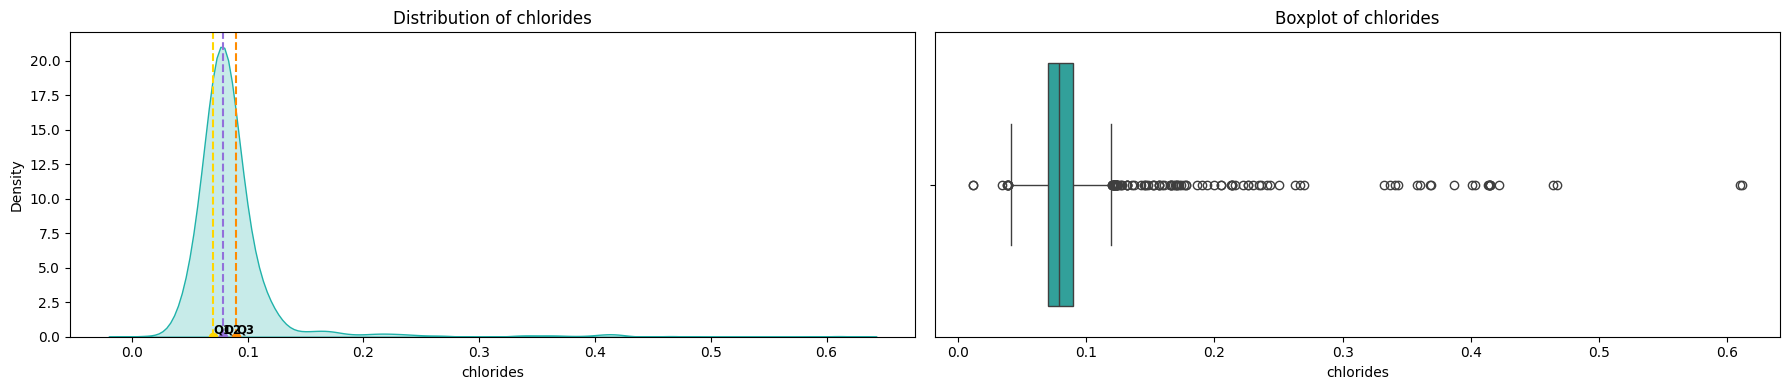

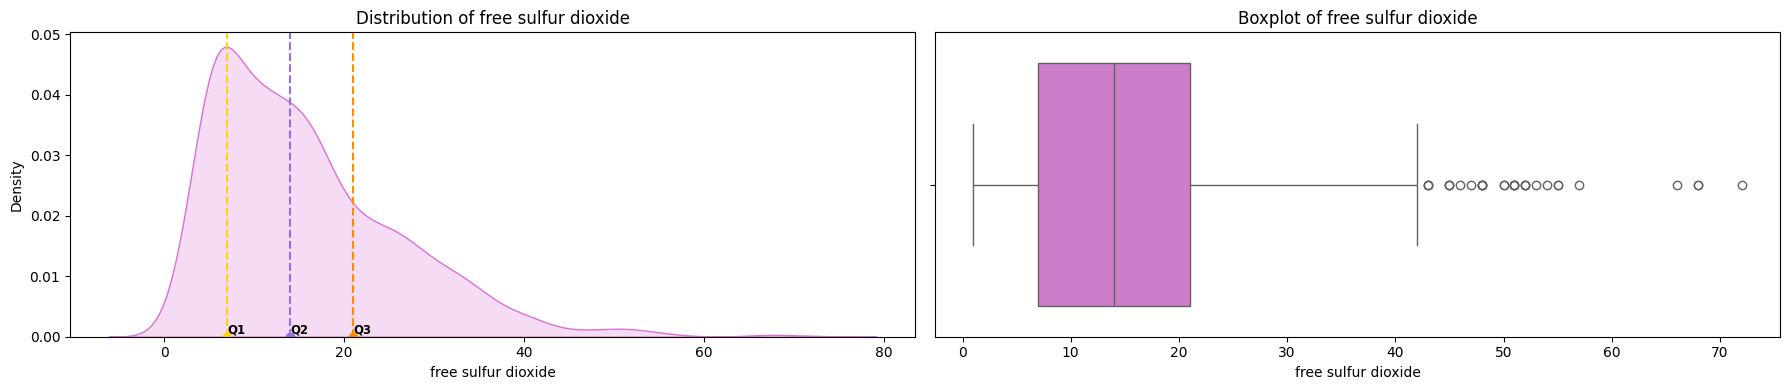

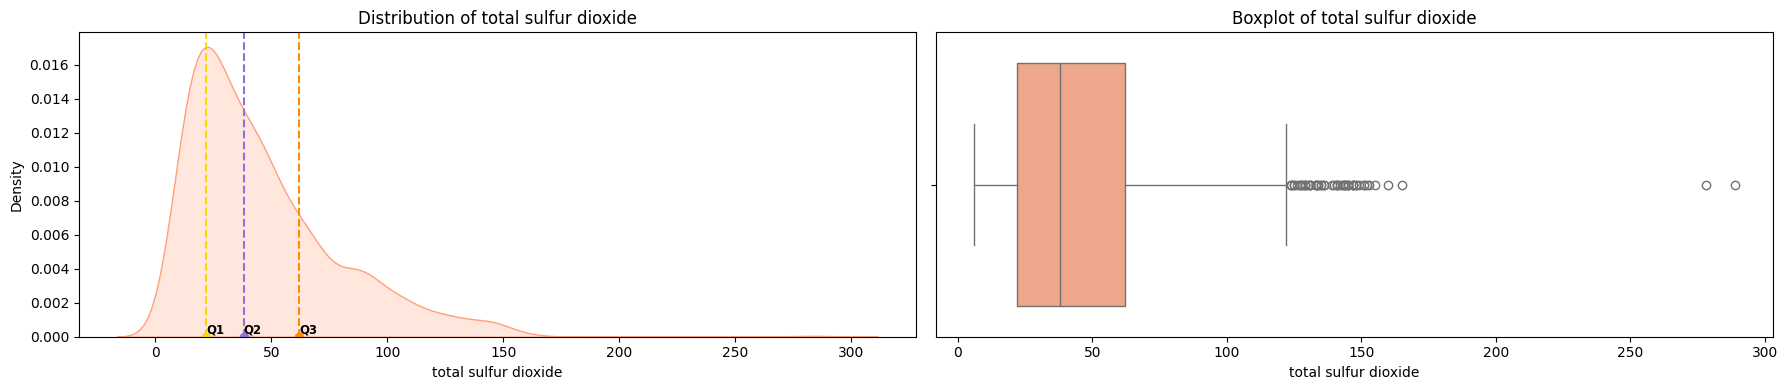

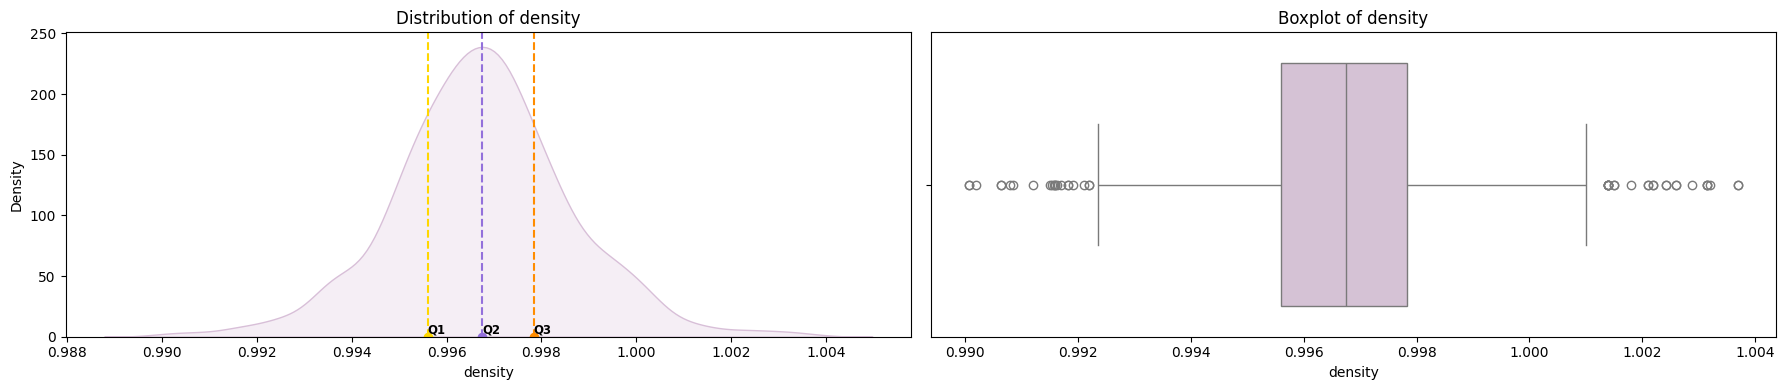

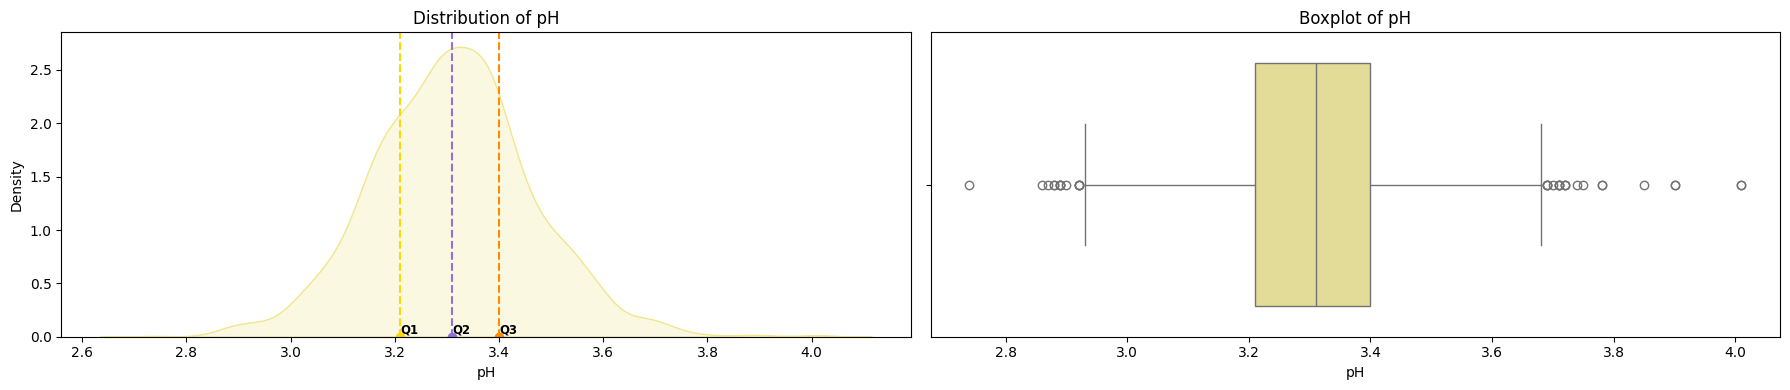

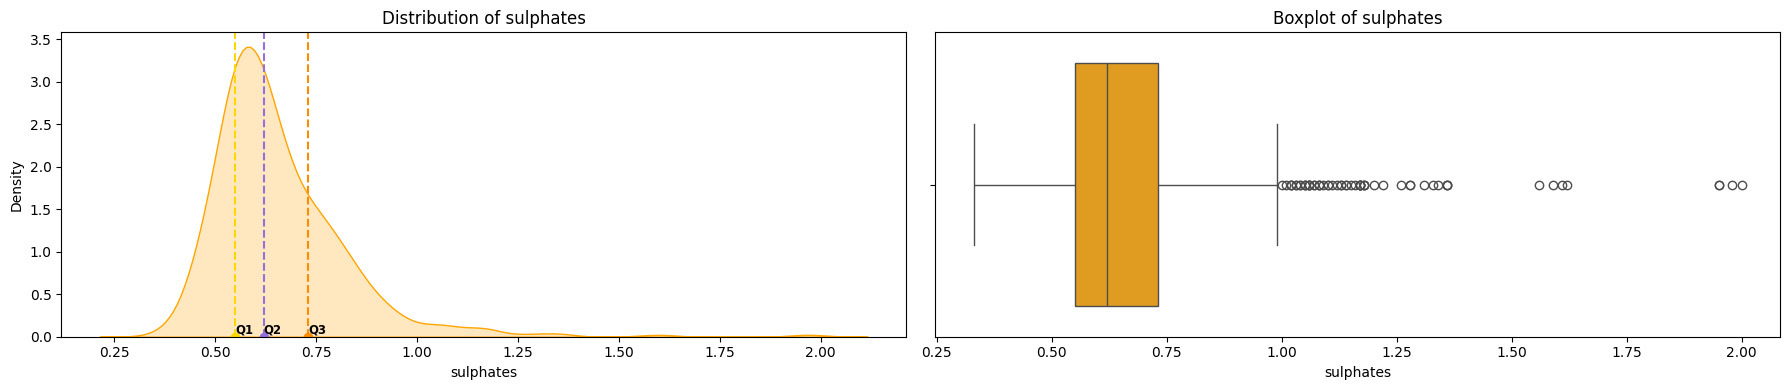

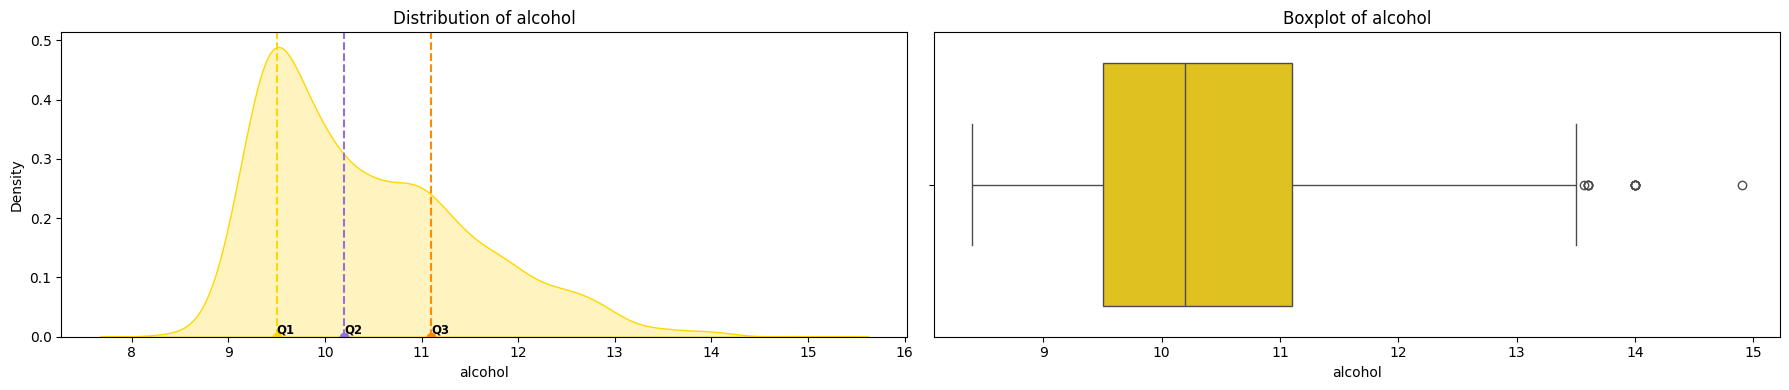

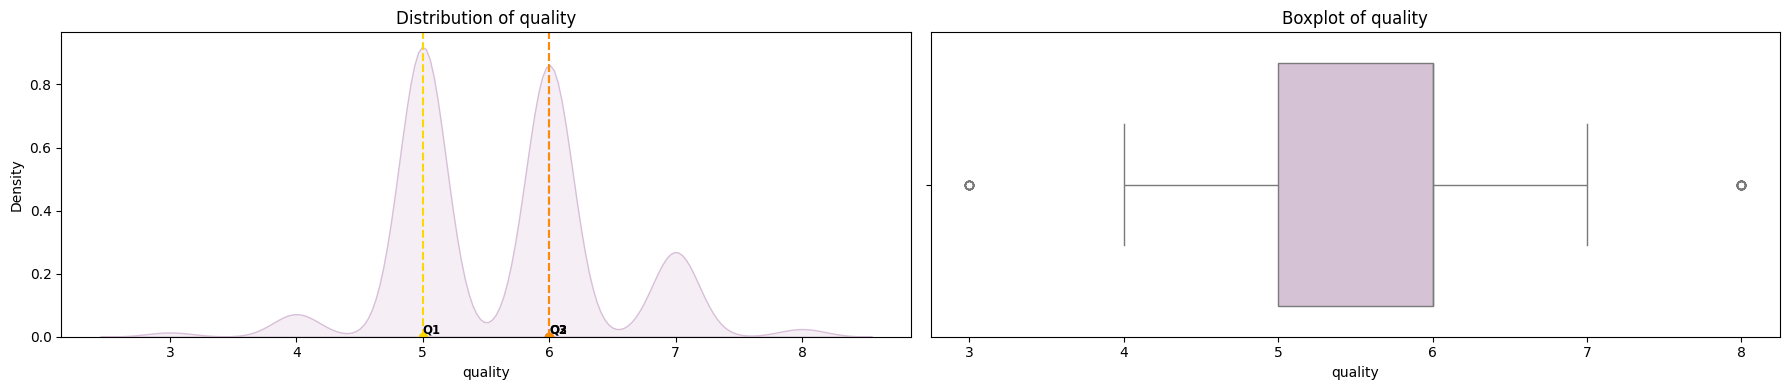

In [12]:

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightseagreen',
          'orchid', 'lightsalmon', 'thistle', 'khaki', 'orange', 'gold', 'thistle']

plot_distributions(wine_df,variables = wine_df.columns,
                   colors = colors )

- **Fixed Acidity**
    - The distribution plot shows that that the Fixed Acidity is right-skewed, which means that there are more wines with lower *fixed acidicity* levels.
    - Also Boxplot: shows that there are a outliers which means some wines have high fixed acidity.
- **Volatile Acidity**
    - Same as *Fixed Acidity* it is right skewed, which means most of the wines have lower *volatile acidity*.
    - There are also outliears as shown in the box plot
- **Citric Acid**
    - This columnd's data has balanced distribution with slight right skew which means most of the wines has *citric acid* livel vetween 0 ± 0.8. Box plot shows that are a really few outliers. 
    
- **Residual Sugar**
    - Distribution: High Right Skew => Most of the wines has low residual sugar level
    - Box Plot: The reight side outliers => Some wines has highl level of residual sugar
- **Chlorides**
    - Distribution: High Right Skew => Most of wines does not have high level of Chlorides
    - Box Plot: The reight side outliers => Some of wines has high level of Chlorides
- **Free Sulfur Dioxide** 
    - Distribution: Right Skew => Most of the wines has low amount of Free Sulfur Dioxide
    - Box Plot: The right side outliers =>  Some wines has high level of Sulfur Dioxide
- **Total Sulfur Dioxide**
    - Distribution: Right Skew =>  Most of the wines has low amount of Total Sulfur Dioxide
    - Box Plot: The right side outliers => Some wines has high level of Total Sulfur Dioxide
- **Density**
    - Distribution: Looks like normally distributed => Most of wines has density between 0.996 ± 0.998
    - Box Plot:There are outliers from both sides => There are some wines which has low density or high density
    
- **pH** - Potential of hydrogen => Used to measure the acidity
    - Distribution: Looks like normally distributed => Most of wines has ph level between 3.2 ± 3.4
    - Box Plot: There are outliers from both sides but more in the righ side => Some wones with high level of acidicity and fewer with low acidicity.
- **Sulphates** 
    - Distribution: Righ Skew => Most of wines has low level of Sulphates
    - Box Plot: The right side oitliers => There are  wines has high level of Sulphates
- **Alcohol**
    - Distribution: Right Skew => Most of the wines has low alc level
    - Box Plot: The right side outliers =>  Some wines has high level of alc level 
- **Quality**
    - Distribution: It is not normally distributed. It shows that the the most wines has 5 and 6 qulaity level  There is a low amount the wines that has quality 4 and 7.

## Correlation

In [13]:
corr = wine_df.corr()

In [14]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


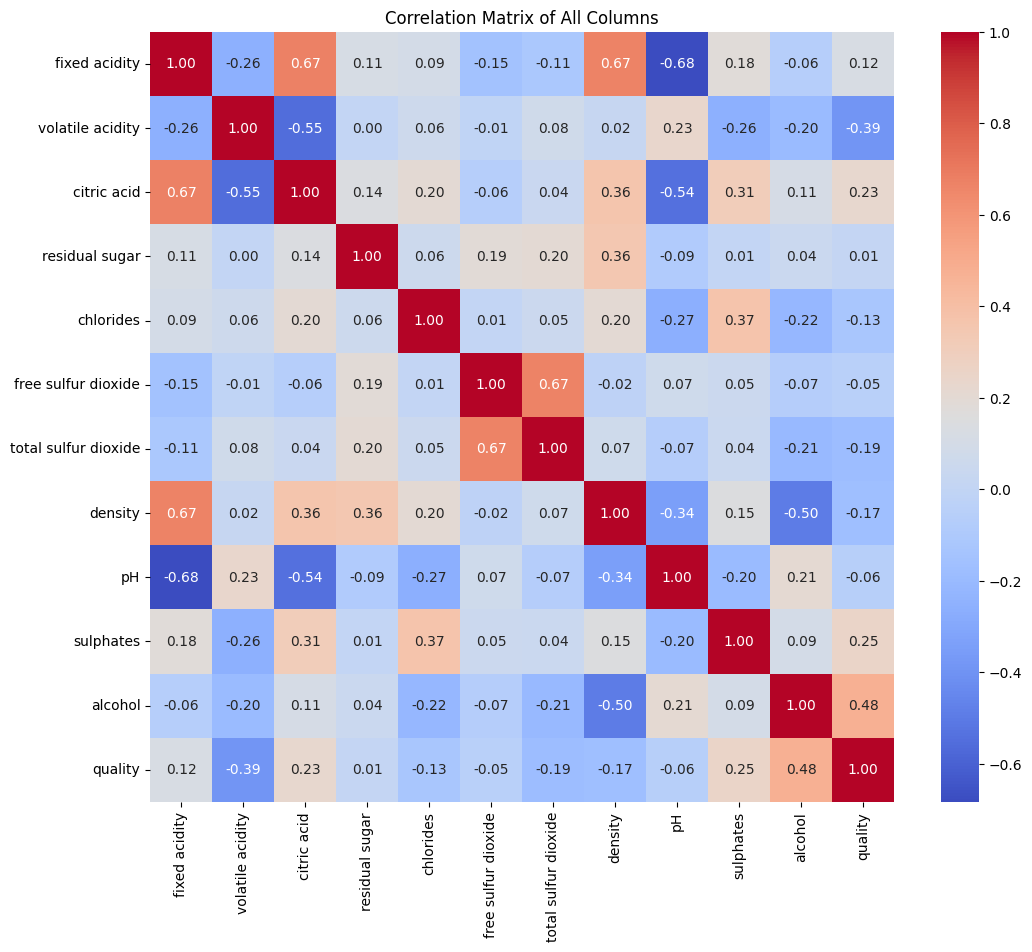

In [15]:

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()

### Variables with Stronger Correlations to Quality:
- **Alcohol (0.47)**:  Strongest positive correlation with quality =>  it means that when the alc lvl is high then the quality is high as weel. (Wine with higher alc considered better?) 
- **Volatile Acidity (-0.39)**: Highest negative correlation with qualtiy => it means that when the volatile acidity increases then the quality lvl decreases. (Low Volatile Acidicity considered better?)
- **Sulphates (0.25)**: Positive correlation with quality => It means the higher sulphate the higher quality, but it has not that strong correlation with quality. 
- **Citric Acid (0.22)**: Positive correlation with quality => It means wines with more citric acid lead to better quality, but it has not that strong correlation with quality. 

### Variables that have highest correlation between each others

- Fixed Acidity and Citric Acid (0.67) => might convey same infromation
- Fixed Acidity and pH (-0.682978) => might convey same infromation
- Free Sulfur Dioxide and Total Sulfur Dioxide (0.66) => It is obvious correlation between them, becuase total sulfux dioxide includes free sulfur dioxided

### Columns that will be used

- **Alcohol** => High positive correlations with quality
- **Volatile Acidity** => High positive correlations with quality
- **Sulphates** => Reasonable positive correlations with quality
- **Citric Acid** => Reasonable positive correlations with quality
- **pH** => It is the basic factor that affects wine's taste,color and chemical stability of the wine. Based on the domain importance it is better to have it.
- **Total Sulfur Dioxide** => It plays important role becuase it keeps out the air and makes sure that wine do not get bad. Also, it keeps away the isects to make sure that this insects does not spoil the wine.
- **Density** => It gives infroamtion about what  level of alc and sugard has the wine, which is important when deciding the quality of the wine.

Because of the above reasons the columsn :Alcohol, Volatile Acidity, Sulphates,Citric Acid,pH,Total Sulfur Dioxide, Density are not dropped. Also, because of the wine domain importance the columns ph,Total Sulfur Dioxide and Density is not dropped.

## Columns to Drop: 

- Fixed Acidity: it conveys simillar infromation as citric acid and pH
- Residual Sugar: Removed as it has low correaltion on wine quality and does not have that much affect on the wine quality
- Chlorides: It has weak correalation on wine and does not have that much affect on the wine quality
- Free Sulfur Dioxide: it conveys simillar infromation as total sulfur dioxide

##  Data Preprocessing

#### Droping Columns

In [16]:
drop_columns = ['fixed acidity', 'residual sugar','chlorides','free sulfur dioxide']

In [17]:
wine_df.drop(drop_columns, axis = 1, inplace=True)

In [18]:
wine_df.columns

Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
wine_df

,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.00,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.04,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.56,60.0,0.99800,3.16,0.58,9.8,6
4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,3.45,0.58,10.5,5
1595,0.550,0.10,51.0,0.99512,3.52,0.76,11.2,6
1596,0.510,0.13,40.0,0.99574,3.42,0.75,11.0,6
1597,0.645,0.12,44.0,0.99547,3.57,0.71,10.2,5


## Handling outliers and Skew Datasets - Log Transformation

In [20]:
columns_to_log_transform = ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

for column in columns_to_log_transform:
    wine_df[column] = np.log(wine_df[column] + 0.01)  # Adding 0.01 to avoid log(0)


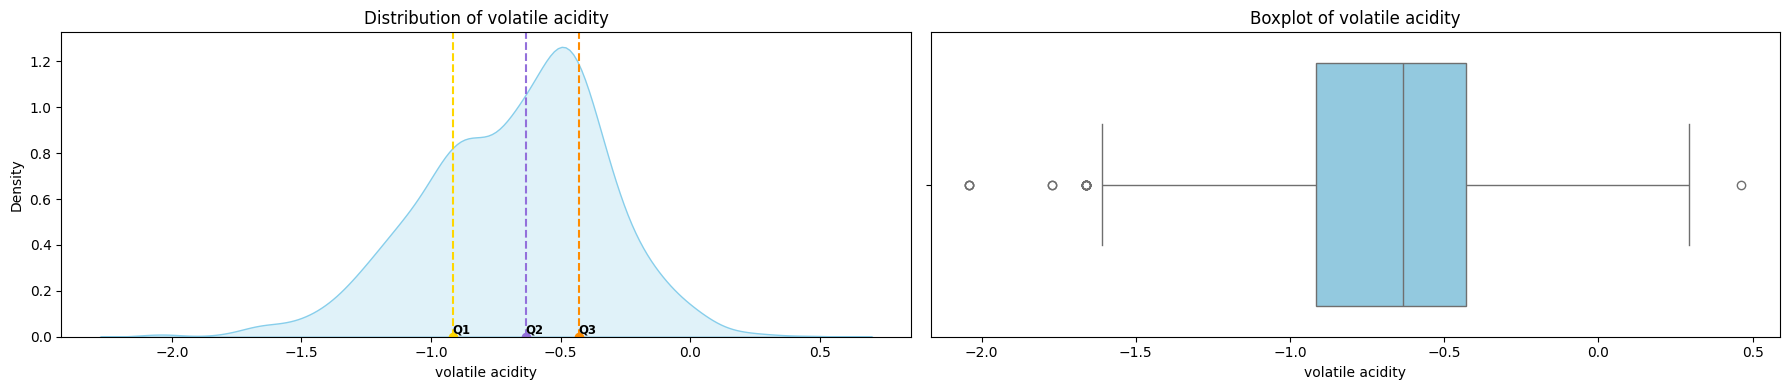

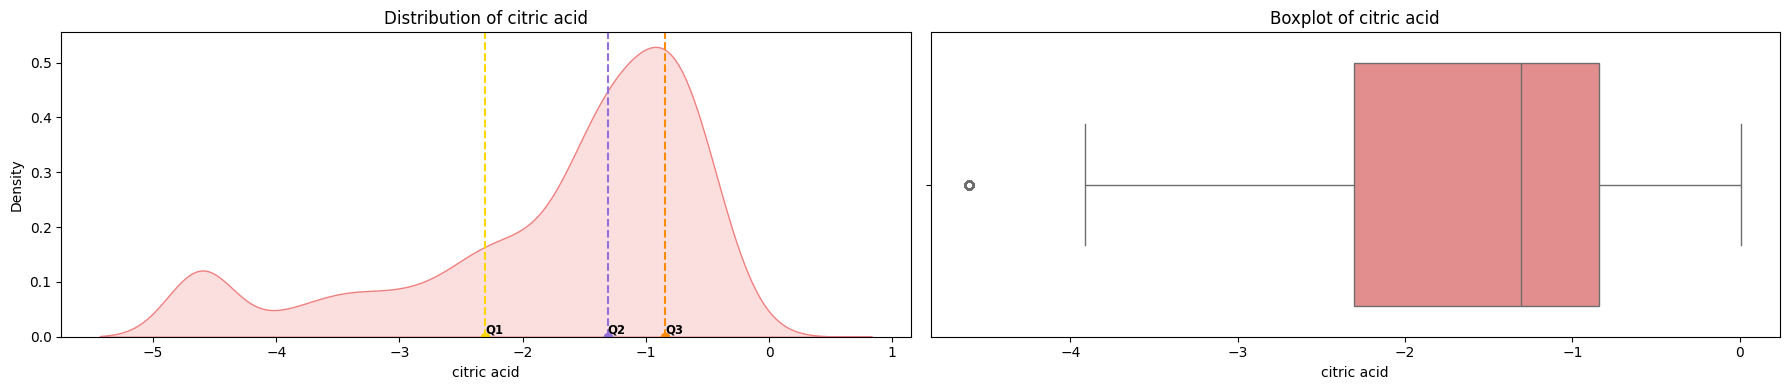

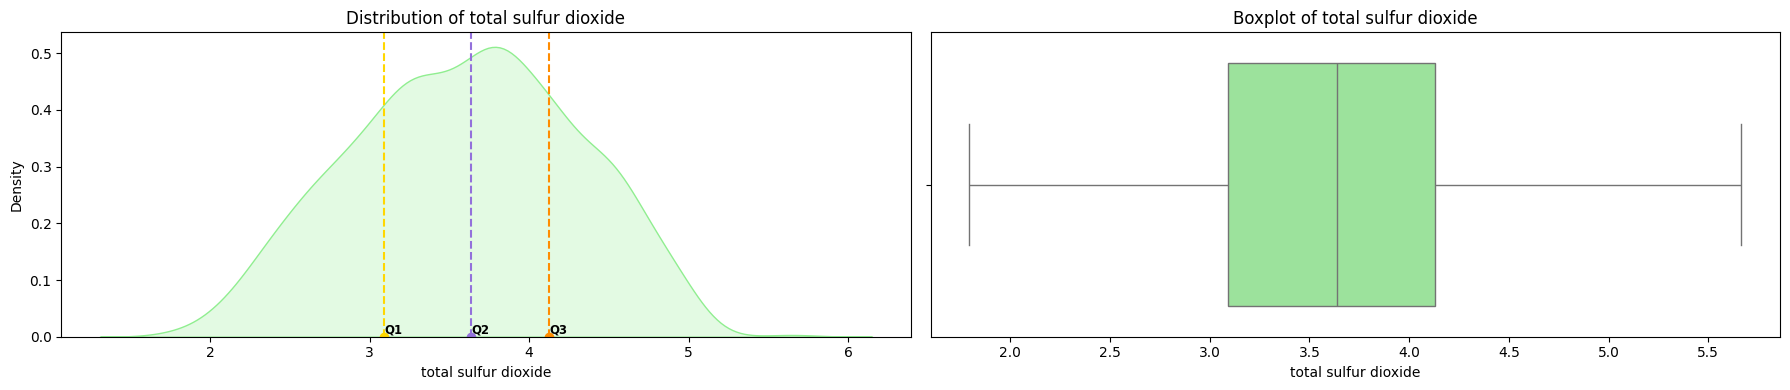

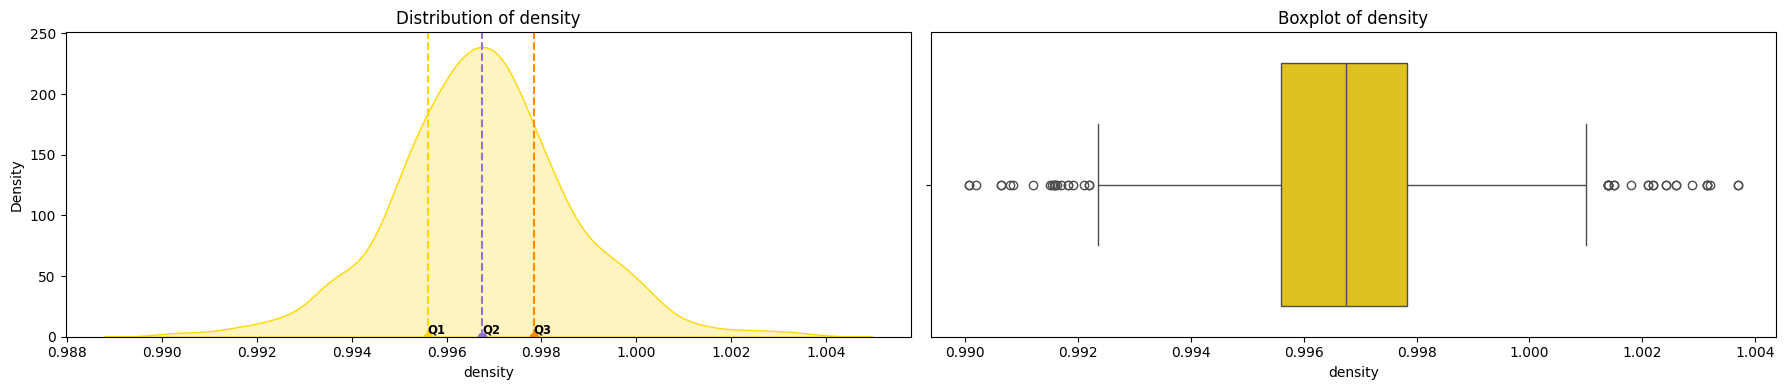

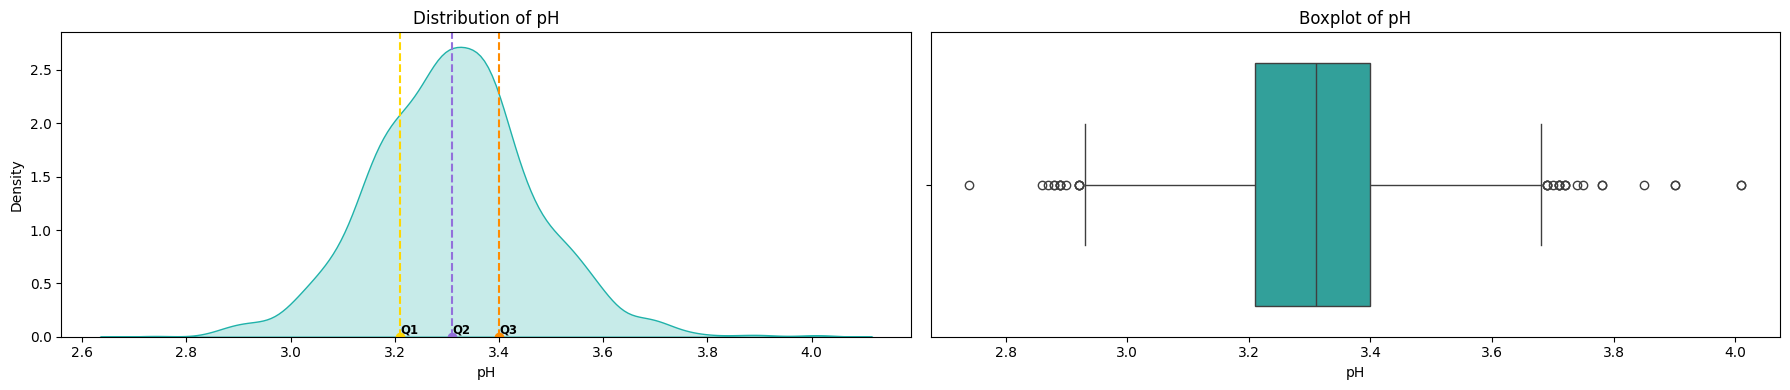

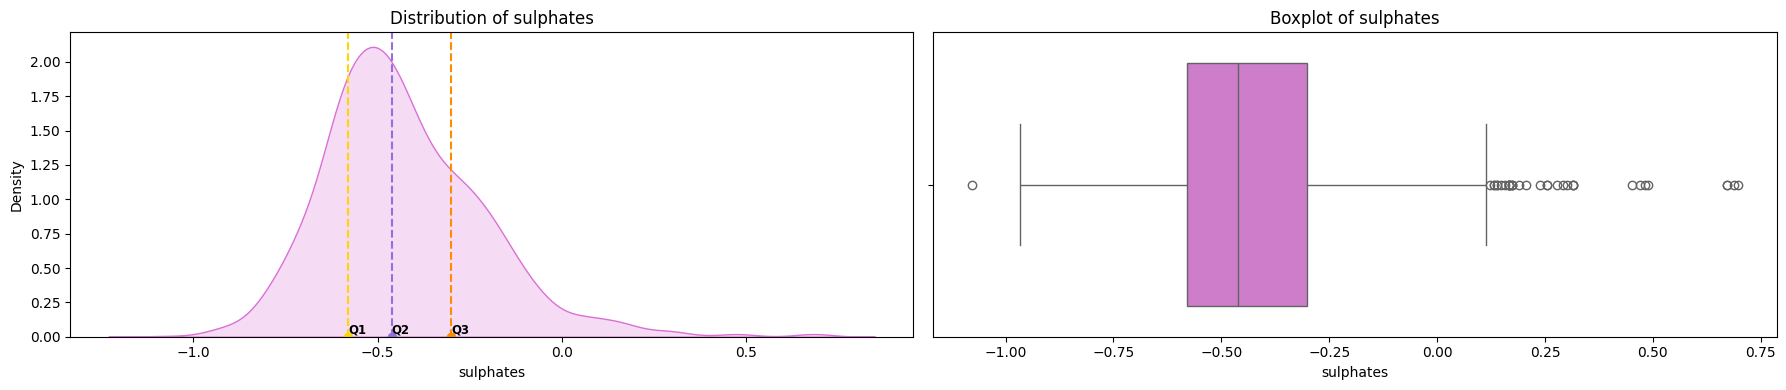

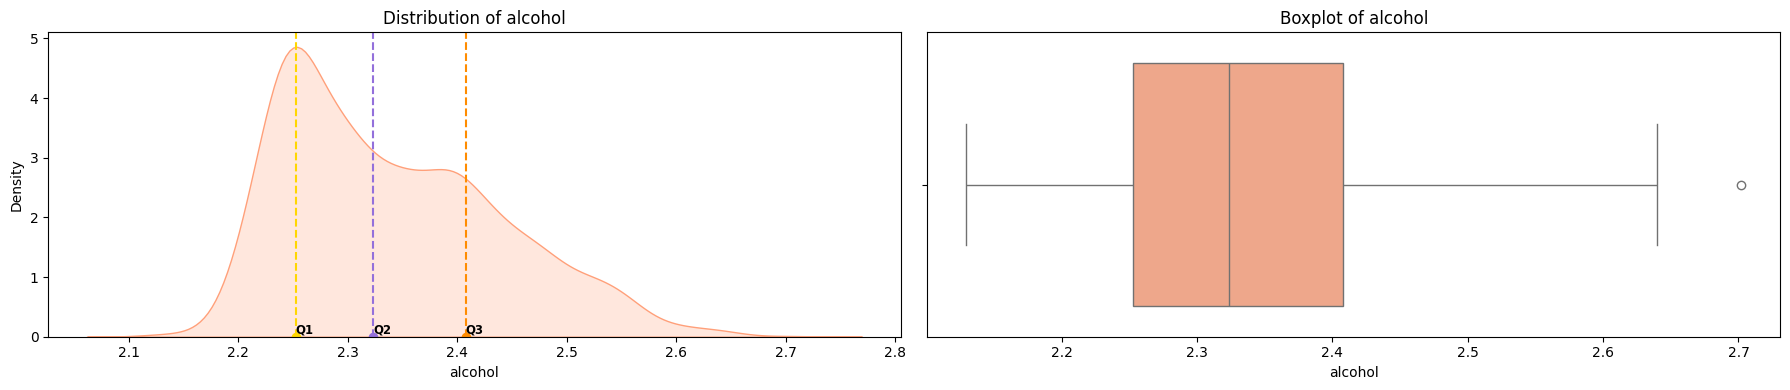

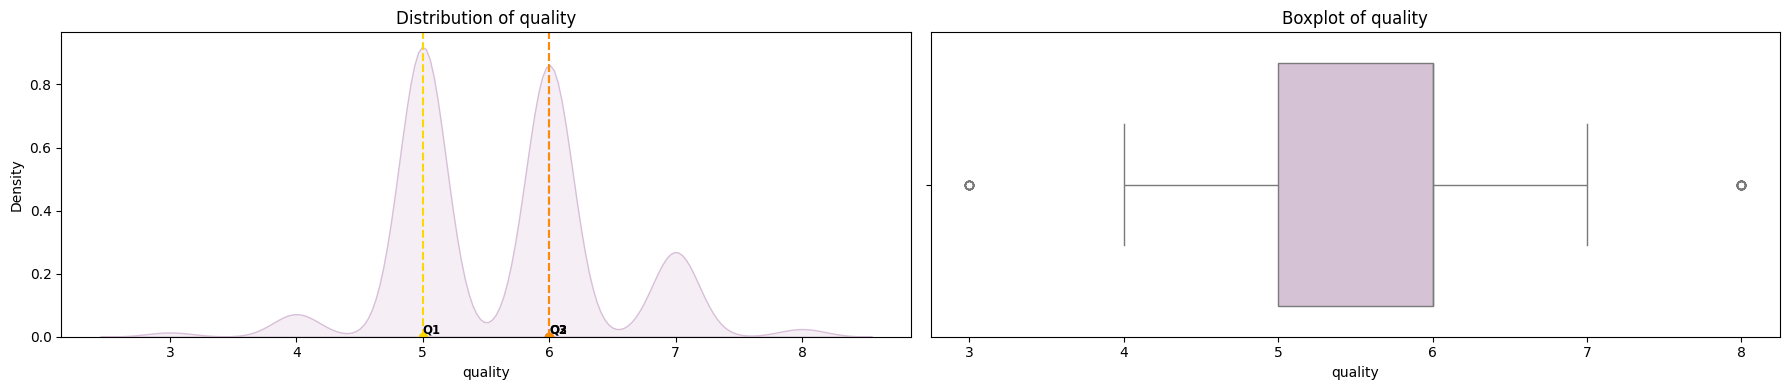

In [21]:
plot_distributions(wine_df,variables = wine_df.columns,
                   colors = colors )

- After log transformation data in each column is in the better shape than before , but some columns like 'volatile acidity', 'citric acid' became slightly left skewed. Also, sulphates column still has outliers. 
- However, we are gonna leave these columns with the result of log transforamtion, because the Random Forest, GBM and XGBClassifier are tollerant to Non-Normality and robust to outliers.

## Transforming quality values to low quality and high quality

In [22]:
map_dict = { 3:"low",4:"low", 5:"low",6:"high",7:"high",8:"high"}

In [23]:
wine_df["quality"] = wine_df["quality"].map(map_dict)

In [24]:
wine_df["quality"].value_counts()

quality
high    855
low     744
Name: count, dtype: int64

## Train Test Split

In [25]:
y = wine_df["quality"]
X = wine_df.drop("quality", axis = 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Standarisation of the Data - Make sure they are on a similar scale

In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Neural Network

In [28]:
import torch.nn as nn
import torch.optim as optim
from torch import Tensor
from torch.utils.data import Dataset, DataLoader

In [29]:
class SimpleNN(nn.Module):

    def __init__(self, *args, **kwargs) -> None:
        super(SimpleNN, self).__init__(*args, **kwargs)

        self.input_layer = nn.Linear(7, 14)
        self.relu = nn.ReLU()

        self.hidden_layer_a = nn.Linear(14, 14)
        self.hidden_layer_b = nn.Linear(14, 7)
        self.output_layer = nn.Linear(7, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        x = self.relu(self.input_layer(x))
        x = self.relu(self.hidden_layer_a(x))
        x = self.relu(self.hidden_layer_b(x))
        x = self.output_layer(x)
        x = self.sigmoid(x)

        return x
    
model = SimpleNN()

In [36]:
learning_rate = 0.001
epochs = 200

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [37]:
import torch
class SimpleDataset(Dataset):

    def __init__(self, data, target) -> None:
        super().__init__()
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        X = Tensor(self.data[index], device='cpu')
        y = Tensor([self.target[index]], device='cpu')
        return X, y

y_train_binary = y_train.apply(lambda x: 1 if x == 'high' else 0).reset_index(drop=True)
y_test_binary = y_train.apply(lambda x: 1 if x == 'high' else 0).reset_index(drop=True)

dataset = SimpleDataset(X_train_scaled, y_train_binary)
dataloader = DataLoader(dataset, batch_size=1, num_workers=0, shuffle=True)

In [38]:
from torcheval.metrics.functional import binary_accuracy, binary_f1_score
targets = Tensor(0)
outputs = Tensor(0)
# Training loop
model.train()
for epoch in range(epochs):
    for input, target in dataloader:
        
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(input)

        # Calculate loss
        loss = criterion(output, target)
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()

        targets = torch.cat([targets, target], dim=1)
        outputs = torch.cat([outputs, output], dim=1)

    # Print the loss for each epoch
    accuracy = binary_accuracy(outputs.squeeze(0), targets.squeeze(0))
    f1score = binary_f1_score(outputs.squeeze(0), targets.squeeze(0))
    
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    print(f"Accuracy: {accuracy * 100:.2f}%'")
    print(f"F1 Score: {f1score}'")

Epoch [1/200], Loss: 0.5009
Accuracy: 68.16%'
F1 Score: 0.6552072763442993'
Epoch [2/200], Loss: 0.7314
Accuracy: 71.15%'
F1 Score: 0.7045888900756836'
Epoch [3/200], Loss: 0.0534
Accuracy: 72.52%'
F1 Score: 0.7227630019187927'
Epoch [4/200], Loss: 0.0461
Accuracy: 73.39%'
F1 Score: 0.7341418266296387'
Epoch [5/200], Loss: 0.0932
Accuracy: 74.08%'
F1 Score: 0.7421990633010864'
Epoch [6/200], Loss: 0.0659
Accuracy: 74.56%'
F1 Score: 0.7478019595146179'
Epoch [7/200], Loss: 0.2445
Accuracy: 74.84%'
F1 Score: 0.7514496445655823'
Epoch [8/200], Loss: 0.0620
Accuracy: 75.07%'
F1 Score: 0.7542567253112793'
Epoch [9/200], Loss: 0.9946
Accuracy: 75.28%'
F1 Score: 0.7565635442733765'
Epoch [10/200], Loss: 0.5850
Accuracy: 75.50%'
F1 Score: 0.7590892314910889'
Epoch [11/200], Loss: 0.1665
Accuracy: 75.70%'
F1 Score: 0.7611977458000183'
Epoch [12/200], Loss: 0.4662
Accuracy: 75.87%'
F1 Score: 0.7631196975708008'
Epoch [13/200], Loss: 0.2755
Accuracy: 75.99%'
F1 Score: 0.7645940184593201'
Epoch [1

## Gradient Boosting Machines (GBM)

In [39]:
gbm_params = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 4, 5, 6]
}

gbm = GradientBoostingClassifier(random_state=101)

gbm_search = GridSearchCV(gbm, gbm_params, verbose=1)
gbm_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 400, 500, 600]},
             verbose=1)

In [40]:
gbm_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 600}

In [41]:

best_gbm = GradientBoostingClassifier(random_state=101, **gbm_search.best_params_)
best_gbm.fit(X_train_scaled, y_train)
y_pred_gbm = best_gbm.predict(X_test_scaled)


f1_gbm = f1_score(y_test, y_pred_gbm, average='macro')
ac_gbm = accuracy_score(y_test, y_pred_gbm)
pr_gbm = precision_score(y_test, y_pred_gbm, average='macro')
balanced_score = balanced_accuracy_score(y_test, y_pred_gbm)
conf_maatrix = confusion_matrix(y_test, y_pred_gbm)

print(f"GBM F1 Score result: {f1_gbm}")
print(f"GBM Accuracy result: {ac_gbm}")
#print(f"GBM Precision result: {pr_gbm}")
print(f"Balanced Accuracy: {balanced_score}",)
print(f"Confusion Matrix:\n {conf_maatrix}", )

GBM F1 Score result: 0.7874665922055128
GBM Accuracy result: 0.7897727272727273
Balanced Accuracy: 0.787148652564474
Confusion Matrix:
 [[236  54]
 [ 57 181]]


## XGBoost Classifier

In [42]:
y_train_num  = y_train.map({"low":0, "high":1})
y_test_num = y_test.map({"low":0, "high":1})

In [43]:


xgb_params = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(random_state=101, use_label_encoder=False, eval_metric='mlogloss')

xgb_search = GridSearchCV(xgb_clf, xgb_params, verbose=1)
xgb_search.fit(X_train_scaled, y_train_num)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=101, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500, 600]},
             verbose=1)

In [44]:
xgb_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 100}

In [45]:
xgb_search.best_params_['n_estimators'] = 200

best_xgb = xgb.XGBClassifier(random_state=101, **xgb_search.best_params_, use_label_encoder=False, eval_metric='mlogloss')
best_xgb.fit(X_train_scaled, y_train_num)
y_pred_xgb = best_xgb.predict(X_test_scaled)


f1_xgb = f1_score(y_test_num, y_pred_xgb, average='macro')
ac_xgb = accuracy_score(y_test_num, y_pred_xgb)
pr_xgb = precision_score(y_test_num, y_pred_xgb, average='macro')
balanced_score = balanced_accuracy_score(y_test_num, y_pred_xgb)
conf_maatrix = confusion_matrix(y_test_num, y_pred_xgb)


print(f"XGBoost F1 Score result: {f1_xgb}")
print(f"XGBoost Accuracy result: {ac_xgb}")
#print(f"XGBoost Precision result: {pr_xgb}")
print(f"Balanced Accuracy: {balanced_score}",)
print(f"Confusion Matrix:\n {conf_maatrix}", )


XGBoost F1 Score result: 0.7796287223038816
XGBoost Accuracy result: 0.7821969696969697
Balanced Accuracy: 0.7791219936250362
Confusion Matrix:
 [[178  60]
 [ 55 235]]


## RandomForestClassifier

In [46]:
params = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
}
forest = RandomForestClassifier(random_state=101)

search = GridSearchCV(forest, params, verbose=1)
search.fit(X, y)
search.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}

In [47]:
search.best_params_['n_estimators'] = 300
forest = RandomForestClassifier(random_state=101, **search.best_params_)
forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)

f1_result = f1_score(y_test, y_pred, average='macro')
ac_result = accuracy_score(y_test, y_pred)
pr_result = precision_score(y_test, y_pred, average='macro')
balanced_score = balanced_accuracy_score(y_test, y_pred)
conf_maatrix = confusion_matrix(y_test, y_pred)

print(f"F1 Score result: {f1_result}")
print(f"Accuracy result: {ac_result}")
#print(f"Precision result: {pr_result}")
print(f"Balanced Accuracy: {balanced_score}",)
print(f"Confusion Matrix:\n {conf_maatrix}", )

F1 Score result: 0.8039375582479031
Accuracy result: 0.8068181818181818
Balanced Accuracy: 0.8026658939437844
Confusion Matrix:
 [[245  45]
 [ 57 181]]


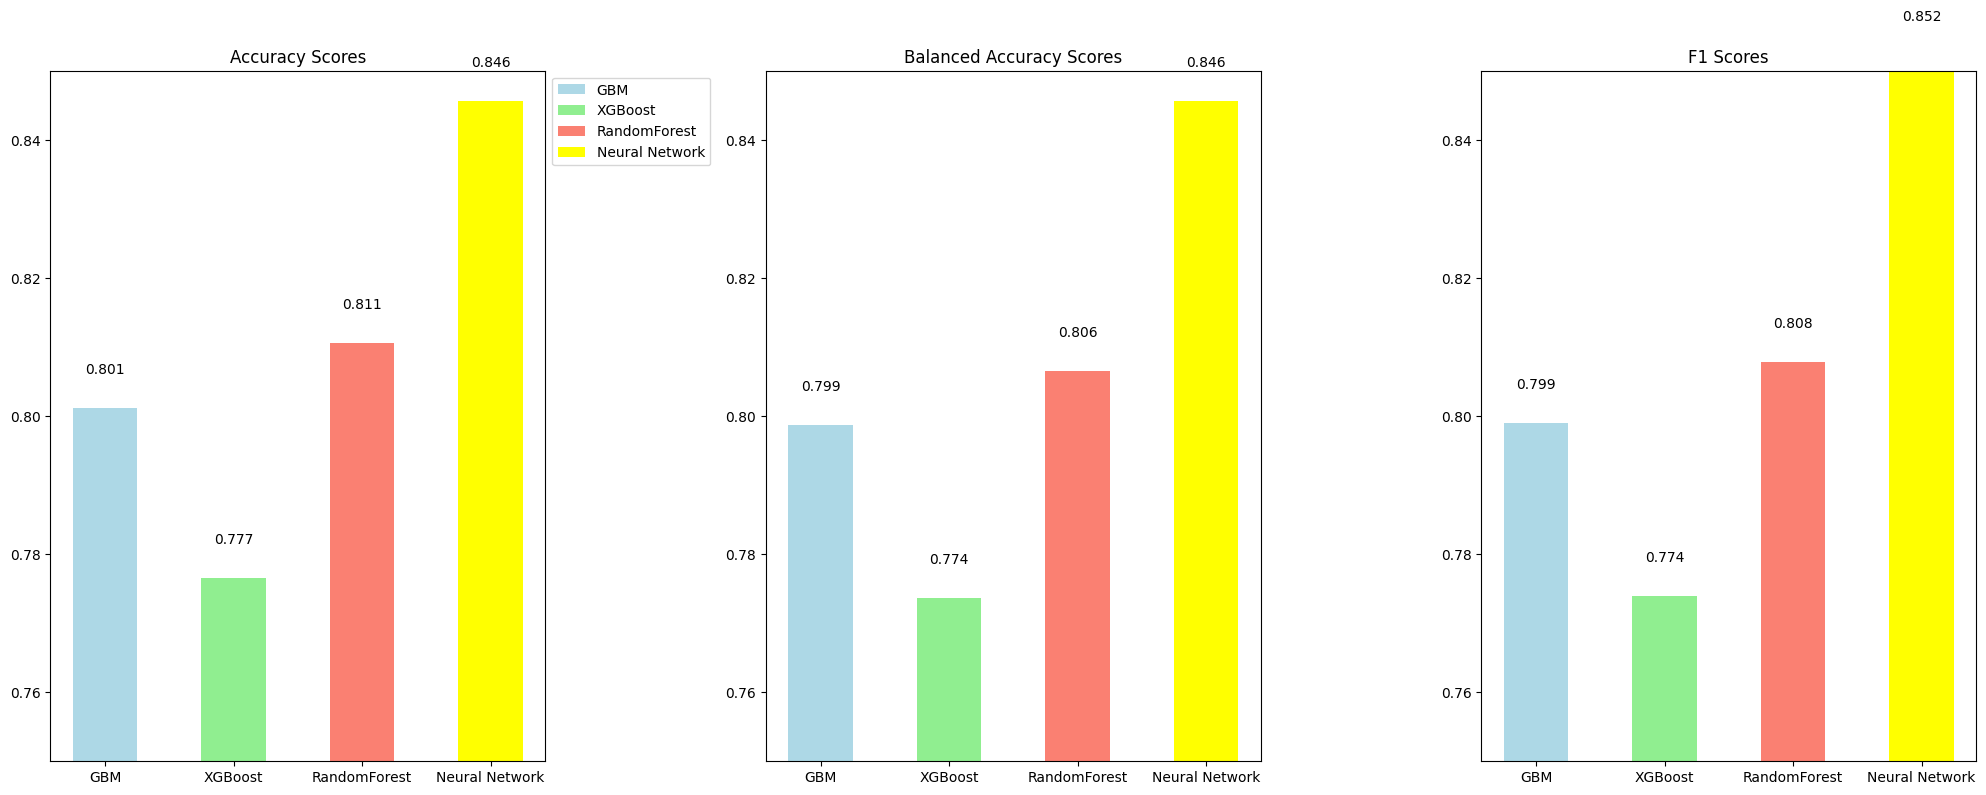

In [54]:
import matplotlib.pyplot as plt
import numpy as np


models = ['GBM', 'XGBoost', 'RandomForest', 'Neural Network']

accuracy_scores = [0.8011363636363636, 0.7765151515151515, 0.8106060606060606, accuracy]
balanced_accuracy_scores = [0.7986235873659808, 0.7735728774268329, 0.8064908722109534, accuracy]
f1_scores = [0.7989548845187284, 0.773972602739726, 0.8077819198508853, f1score]

model_colors = ['lightblue', 'lightgreen', 'salmon', 'yellow']

def plot_metric(scores, title, colors, ax):
    x_pos = np.arange(len(models))
    for i, (score, color) in enumerate(zip(scores, colors)):
        ax.bar(x_pos[i], score, color=color, label=models[i], width=0.5)
        ax.text(x_pos[i], score + 0.005, f'{score:.3f}', ha='center')
    ax.set_title(title)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models)
    ax.set_ylim(0.75, 0.85) 


fig, axs = plt.subplots(1, 3, figsize=(20, 8))

plot_metric(accuracy_scores, 'Accuracy Scores', model_colors, axs[0])
plot_metric(balanced_accuracy_scores, 'Balanced Accuracy Scores', model_colors, axs[1])
plot_metric(f1_scores, 'F1 Scores', model_colors, axs[2])


axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## Accuracy

- Neural Network 84%
- RandomForest 81%*
- GBM 80%
- XGBoost 78%


*Neural network showed the best performance(84% of the time) on predicting the right quality of wine's compared to Random foreast(81% of the time) and  GBM(80% of the time), while the lowest performance showed XGBoost(78%)*

## Balanced Accuracy

- Neural Network 84%
- RandomForest 80%
- GBM 79%
- XGBoost 77%

*Balance Accuracy shows that that Neural network with 84% is better on indetifying both high and low quality wines compared to RandomForest(80%), GBM(79%) and XGBoost(77).*

## F1 score

- Neural Network 84%
- RandomForest 80%
- GBM 79%
- XGBoost 77%

- By looking at at F1 score it is possible to say that the Neural Network has better balance of recall and precission, It performs well on identifying boith wine's quality
- In general: All three models showed good skills in clasification of wine's quality

In conclusion, all fourd models predicted both low and high wine qualities with good results. However, the neural network and random forest showed the best preformance compared to other models.